In [1]:
import pickle
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


dataset = pd.read_csv('../datasets/titanic.csv', encoding='latin-1')
dataset = dataset.rename(columns=lambda x: x.strip().lower())

dataset=dataset[dataset.columns[1:]] # Delete first column from dataset


dataset['age'] = dataset['age'].fillna(np.mean(dataset['age']))

In [3]:
dataset

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [4]:
le = LabelEncoder() # Convert catregorical data to numeric using self assigned numeric values for each class. Also for numeric data
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i]) # Fits and Transforms all data columns to their corresponding encoded numeric values
    
  

In [5]:
dataset

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,108,1,28,1,0,523,18,147,2
1,1,0,190,0,52,1,0,596,207,81,0
2,1,2,353,0,34,0,0,669,41,147,2
3,1,0,272,0,48,1,0,49,189,55,2
4,0,2,15,1,48,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,147,2
887,1,0,303,0,24,0,0,14,153,30,2
888,0,2,413,0,39,1,2,675,131,147,2
889,1,0,81,1,34,0,0,8,153,60,0


In [6]:
dataset.corr()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
survived,1.000000,-0.338481,-0.057343,-0.543351,-0.062470,-0.026385,0.081629,-0.164549,0.333943,-0.254888,-0.163517
pclass,-0.338481,1.000000,0.052831,0.131900,-0.336631,0.078141,0.018443,0.319869,-0.724119,0.684121,0.157112
name,-0.057343,0.052831,1.000000,0.020314,0.057270,-0.035535,-0.049105,0.047348,-0.053846,0.061959,-0.004557
sex,-0.543351,0.131900,0.020314,1.000000,0.078523,-0.123164,-0.245489,0.059372,-0.265389,0.096681,0.104057
age,-0.062470,-0.336631,0.057270,0.078523,1.000000,-0.244913,-0.165137,-0.071081,0.122586,-0.234884,-0.019047
sibsp,-0.026385,0.078141,-0.035535,-0.123164,-0.244913,1.000000,0.423338,0.069238,0.368688,0.040729,0.063983
parch,0.081629,0.018443,-0.049105,-0.245489,-0.165137,0.423338,1.000000,0.020003,0.361243,-0.028324,0.038322
ticket,-0.164549,0.319869,0.047348,0.059372,-0.071081,0.069238,0.020003,1.000000,-0.168153,0.243696,-0.006041
fare,0.333943,-0.724119,-0.053846,-0.265389,0.122586,0.368688,0.361243,-0.168153,1.000000,-0.540116,-0.152946
cabin,-0.254888,0.684121,0.061959,0.096681,-0.234884,0.040729,-0.028324,0.243696,-0.540116,1.000000,0.193205


<AxesSubplot:>

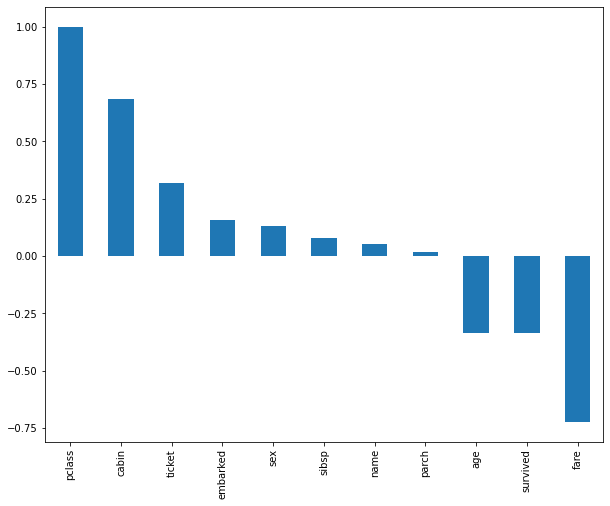

In [7]:
dataset.corrwith(dataset['pclass']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

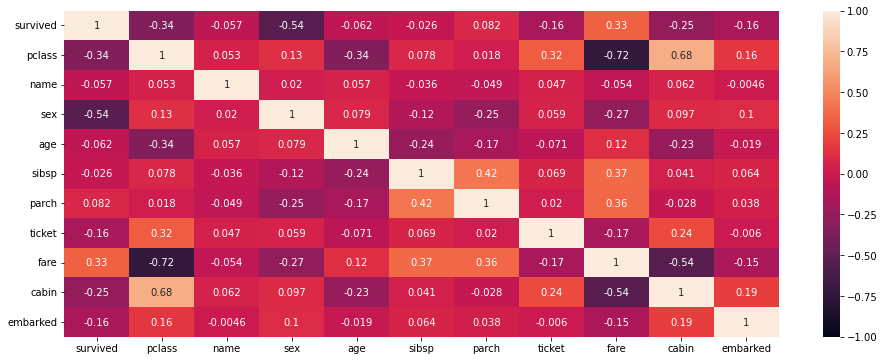

In [8]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [9]:
X = dataset.drop(['survived'], axis=1) #we want to predict pclass from the given samples so exclude pclass from features
y = dataset['survived'] #Make pclass as your output y vector

In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

treeModel = RandomForestClassifier(max_depth=2, random_state=0)

treeModel.fit(X_train, y_train)
y_predict = treeModel.predict(X_test)
y_predict_p = treeModel.predict_proba(X_test)

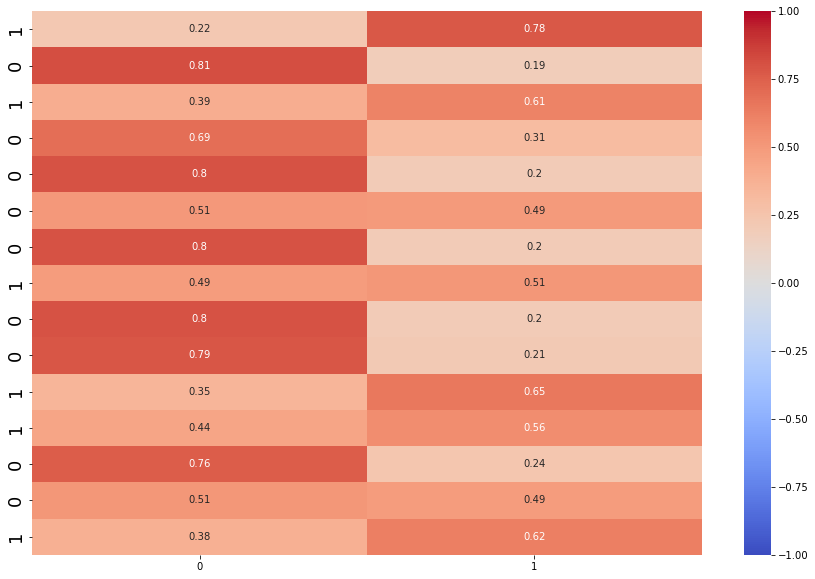

In [12]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(pd.DataFrame(y_predict_p)[:15], vmin=-1, vmax=1, annot=True,yticklabels=y_predict[:15],cmap='coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

In [13]:
dfg = pd.DataFrame(y_predict_p,columns='label1_p,label2_p'.split(','))
dfg['predicted_label']= y_predict
dfg['original_label']= list(y_test)
dfg.head(15)

,label1_p,label2_p,predicted_label,original_label
0,0.222804,0.777196,1,1
1,0.812743,0.187257,0,0
2,0.393703,0.606297,1,1
3,0.693382,0.306618,0,0
4,0.797661,0.202339,0,0
5,0.506173,0.493827,0,0
6,0.804432,0.195568,0,1
7,0.485122,0.514878,1,0
8,0.804618,0.195382,0,0
9,0.788284,0.211716,0,0


In [14]:
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

[[112  11]
 [ 22  34]]

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       123
           1       0.76      0.61      0.67        56

    accuracy                           0.82       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.81      0.82      0.81       179



In [15]:
acc= []


for i in range(1, 20):
    tr = RandomForestClassifier(max_depth=i, random_state=0)
    tr.fit(X_train, y_train)
    pred_i = tr.predict(X_test)
    acc.append(accuracy_score(y_test,pred_i))
    



Text(0, 0.5, 'Accuracy')

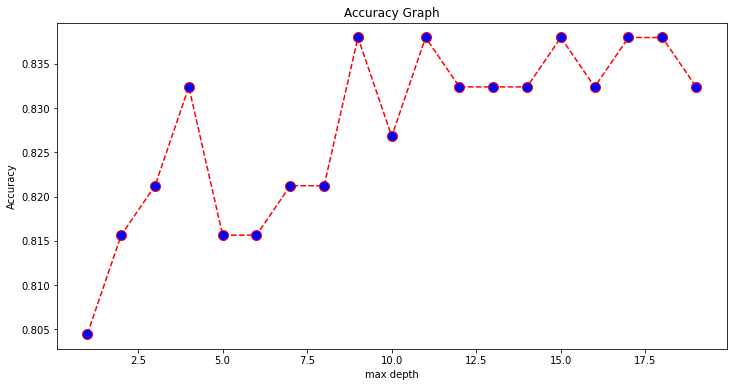

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy Graph')
plt.xlabel('max depth')
plt.ylabel('Accuracy')

In [20]:
treeModel.estimators_[:5]

[DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=2, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=441365315)]

In [21]:
treeModel.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

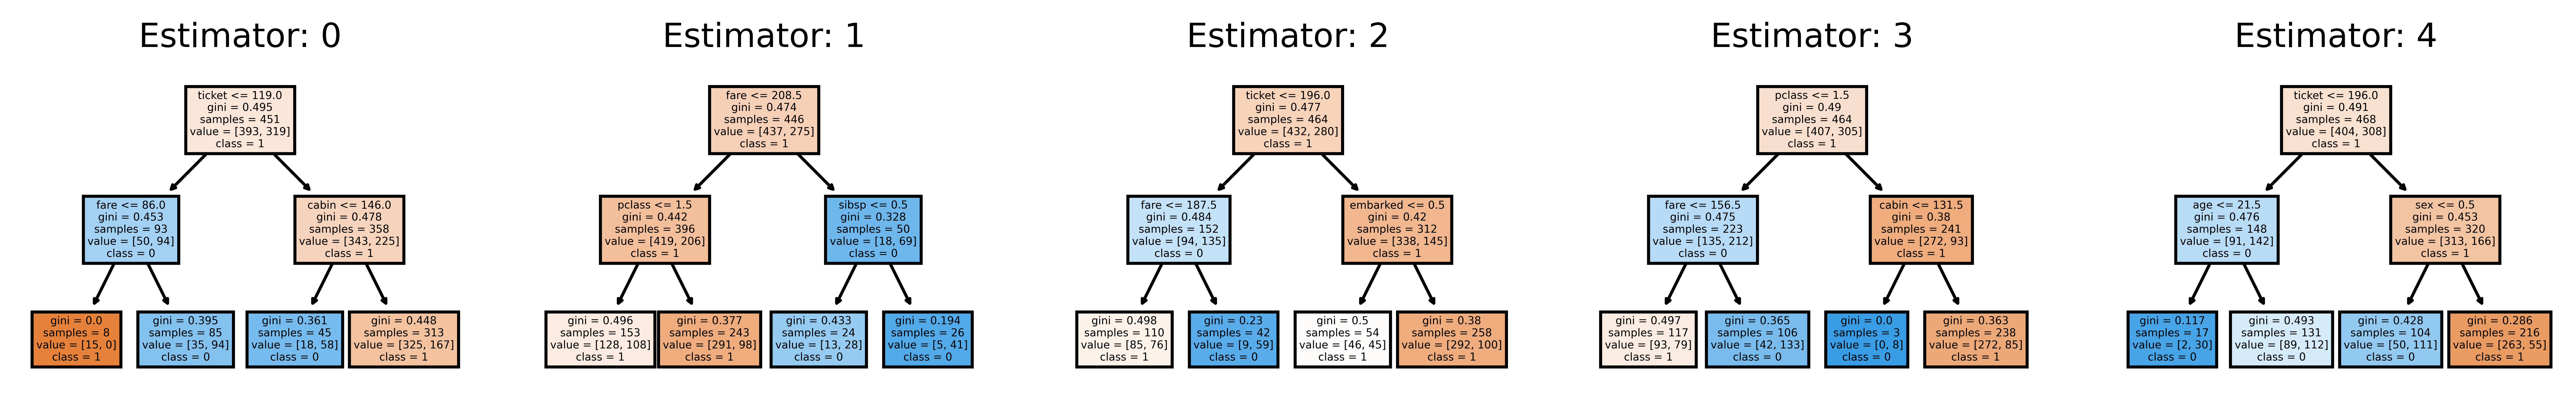

In [22]:
fn=X.columns
cn=[str(i) for i in y_train]
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(treeModel.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:

import pyautogui,time
import os

In [ ]:

os.system('start notepad.exe')

time.sleep(3)
for i in range(5):
    
    pyautogui.typewrite('How are you')
    pyautogui.press('enter')

In [ ]:

os.system('start notepad.exe')

In [ ]:
import chess

In [ ]:
b=chess.Board("r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3")

In [ ]:
b.legal_moves

In [ ]:
b.push_san("Bc5")

In [ ]:
b

In [ ]:
b.fen()